# Ejercicios Pair Programming 
## Lección 5 - Normalización

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

In [28]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
# Establecer tamaño gráficas
plt.rcParams["figure.figsize"] = (10,10)

# Warning
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv("supermercado_normalizado.csv", index_col=0)

In [30]:
df.head()

,id,year_birth,education,marital_status,income,dt_customer,numdealspurchases,numstorepurchases,numwebvisitsmonth,numwebpurchases_sklearn
0,1826,1970,Graduation,Divorced,84835.0,6/16/2014,1,6,1,0.363636
1,1,1961,Graduation,Single,57091.0,6/15/2014,1,7,5,0.636364
2,10476,1958,Graduation,Married,67267.0,5/13/2014,1,5,2,0.272727
3,1386,1967,Graduation,Together,32474.0,11/5/2014,1,2,7,0.090909
4,5371,1989,Graduation,Single,21474.0,8/4/2014,2,2,7,0.272727


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.

### 1.- Sklearn StandarScaller

In [31]:
# Creamos un dataframe para las columnas numéricas
numericas = df.select_dtypes(include=np.number)

In [32]:
numericas.head()

,id,year_birth,income,numdealspurchases,numstorepurchases,numwebvisitsmonth,numwebpurchases_sklearn
0,1826,1970,84835.0,1,6,1,0.363636
1,1,1961,57091.0,1,7,5,0.636364
2,10476,1958,67267.0,1,5,2,0.272727
3,1386,1967,32474.0,1,2,7,0.090909
4,5371,1989,21474.0,2,2,7,0.272727


In [33]:
# Eliminamos la variable respuesta de nuestro análisis de estandarización
numericas.drop(["numwebpurchases_sklearn"], axis = 1, inplace = True)

numericas.head(2)

,id,year_birth,income,numdealspurchases,numstorepurchases,numwebvisitsmonth
0,1826,1970,84835.0,1,6,1
1,1,1961,57091.0,1,7,5


In [34]:
# Inicializamos el método para escalar.
scaler = StandardScaler()

In [35]:
# Ajustamos nuestros datos.  

scaler.fit(numericas)

StandardScaler()

In [36]:
# Transformamos los datos.

web_escaladas = scaler.transform(numericas)

In [37]:
# Convertimos en dataframe el array que nos ha generado tras la transformación.

numericas_estandar = pd.DataFrame(web_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,id,year_birth,income,numdealspurchases,numstorepurchases,numwebvisitsmonth
0,-1.157073,0.092613,1.608976,-0.701068,0.052191,-1.803407
1,-1.719067,-0.676627,0.264394,-0.701068,0.361131,-0.142553


In [38]:
# Creamos un for loop para iterar por todas las columnas y ver su media y su desviación estándar.
for columna in numericas_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_estandar[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna id es:  3.2268062477752054e-17
La desviación estándar de la columna id es: 1.0002271436712997
-------------------------------------------------------------
La media de la columna year_birth es:  7.434561594874072e-15
La desviación estándar de la columna year_birth es: 1.0002271436712997
-------------------------------------------------------------
La media de la columna income es:  -1.3552586240655862e-16
La desviación estándar de la columna income es: 1.0002271436712997
-------------------------------------------------------------
La media de la columna numdealspurchases es:  -2.2587643734426437e-17
La desviación estándar de la columna numdealspurchases es: 1.0002271436712997
-------------------------------------------------------------
La media de la columna numstorepurchases es:  -1.169717264818512e-16
La desviación estándar de la columna numstorepurchases es: 1.0002271436712997
-------------------------------------------------------------
La media de la colum

In [39]:
# Comprobamos los principales estadísticos de nuestras variables estandarizadas.
numericas_estandar.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2202.0,3.226806e-17,1.000227,-1.719375,-0.852749,-0.039705,0.872727,1.726805
year_birth,2202.0,7.434562e-15,1.000227,-2.471520,-0.847569,0.092613,0.690911,2.314862
income,2202.0,-1.355259e-16,1.000227,-2.418616,-0.796117,-0.016212,0.806620,2.609077
numdealspurchases,2202.0,-2.258764e-17,1.000227,-1.231566,-0.701068,-0.170569,0.359930,6.725913
numstorepurchases,2202.0,-1.169717e-16,1.000227,-1.801448,-0.874628,-0.256748,0.670071,2.214771
numwebvisitsmonth,2202.0,-1.677939e-16,1.000227,-2.218621,-0.972980,0.272661,0.687874,6.085652


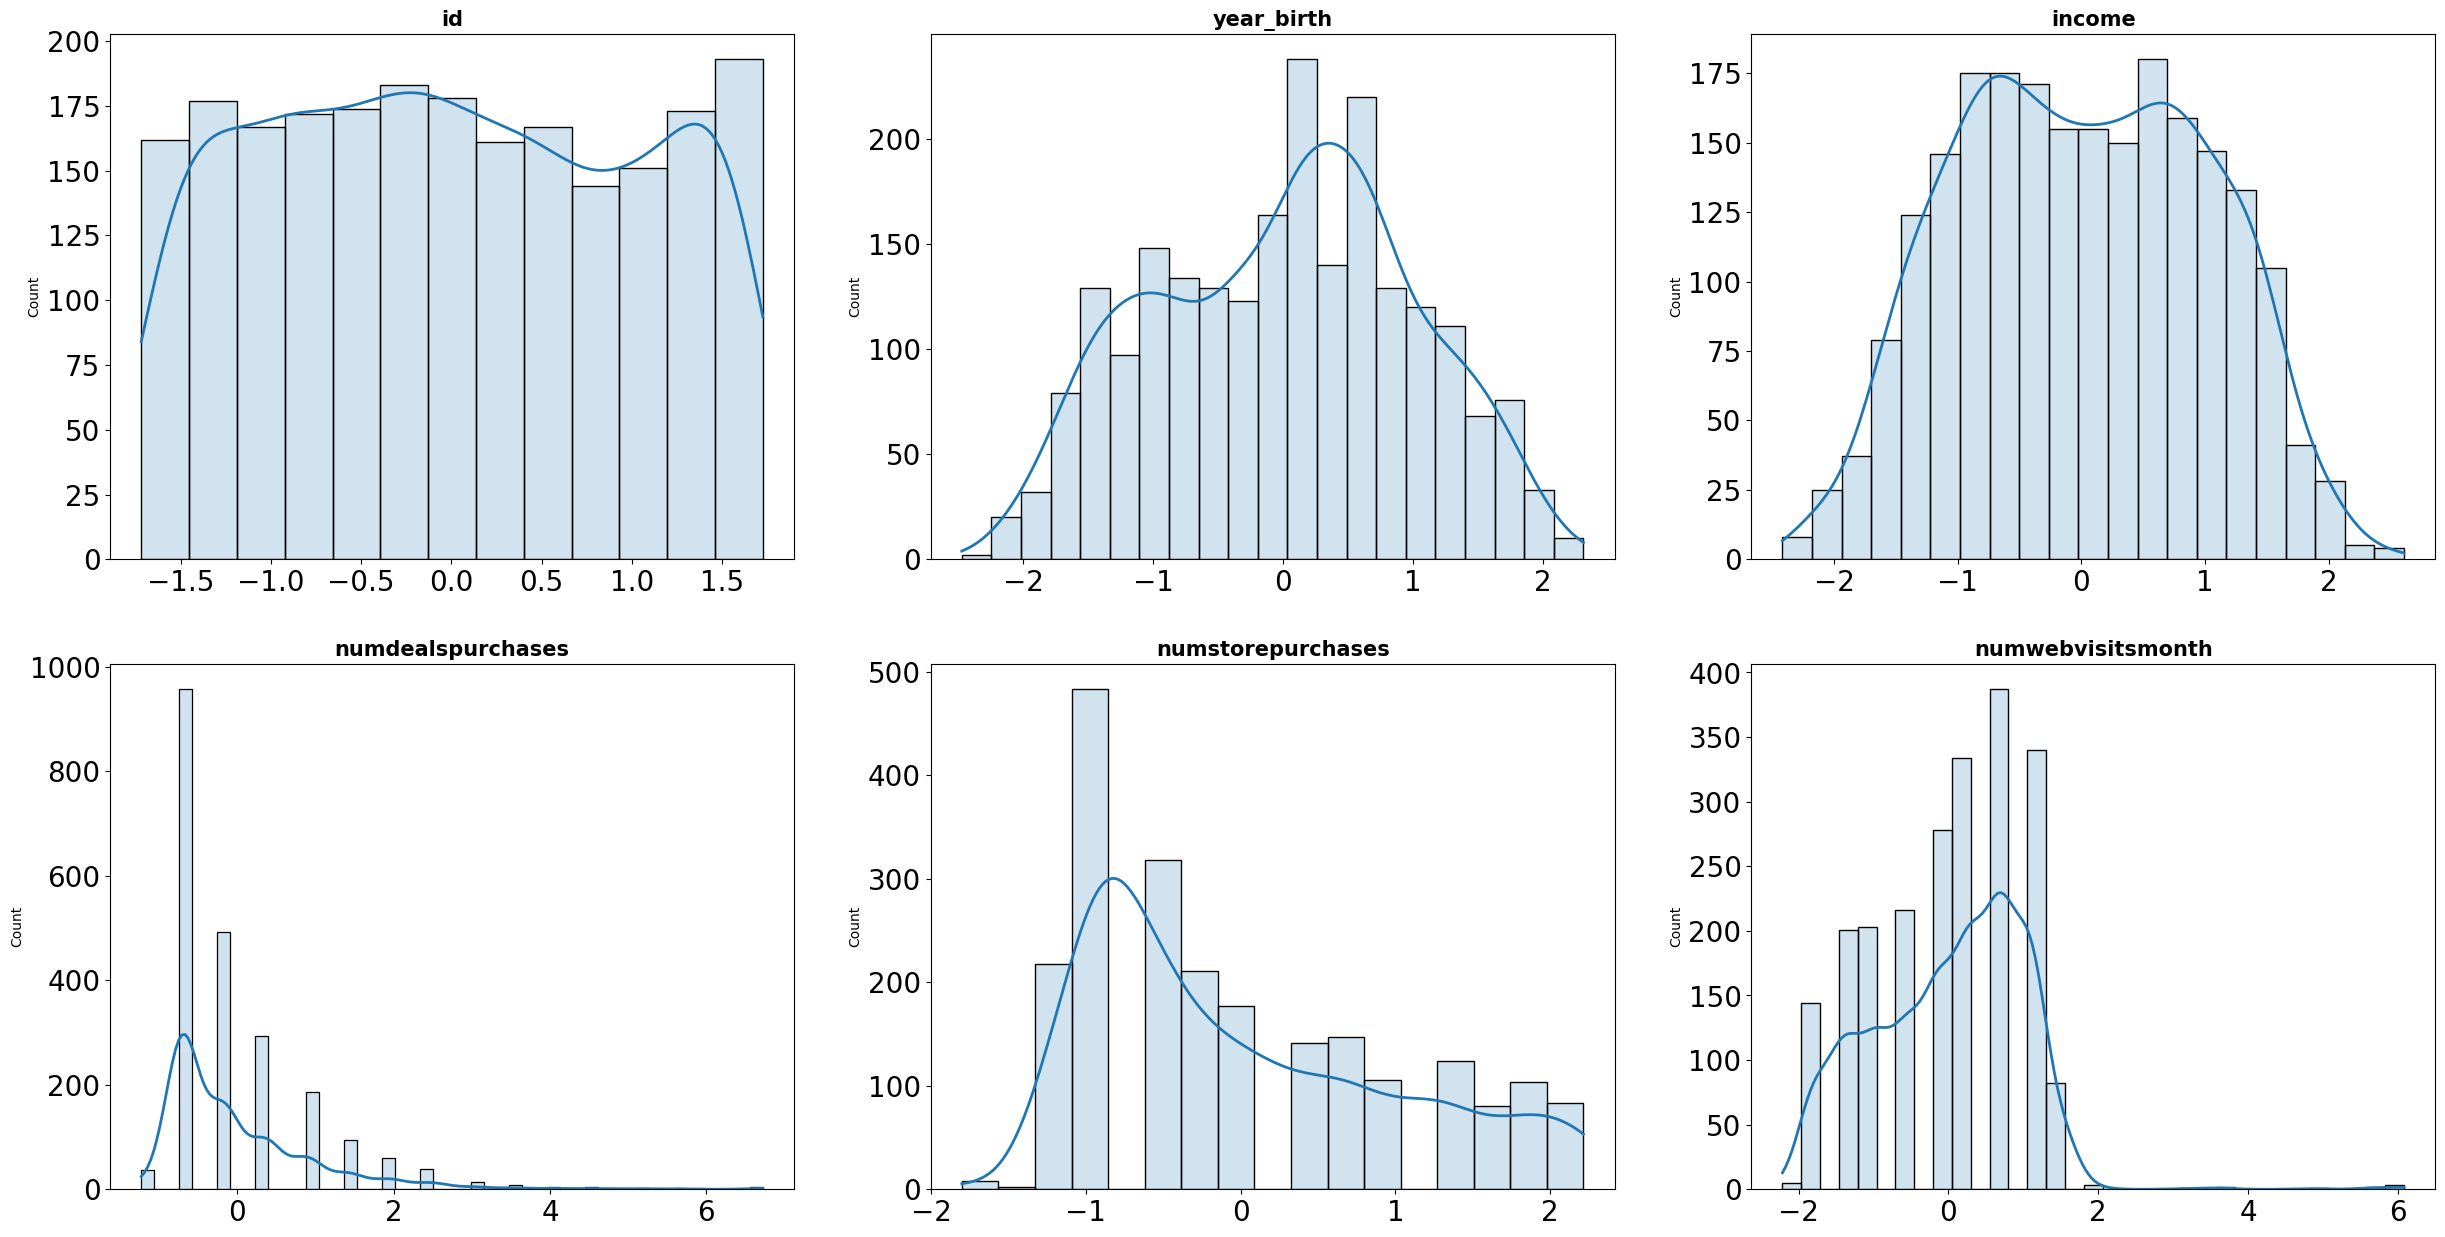

In [40]:
# Creamos un gráfico para ver la distribución de nuestros datos ya estandarizados.
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 15))

columnas_estandar = numericas_estandar.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")


Encontramos nuestras variables predictoras ya estandarizadas, es decir, están todas (más o menos) dentro de un rango. En el caso de "Income" vemos que la media sería ahora el valor = 0 y se encuentra entre la escala -2.5 a 2.5. 

### 2.- Sklearn RobustScaler

Ahora realizamos la estandarización con el modelo RobustScaler ya que al tratar los outliers en el EDA nos aparecen muchos menos. En los outliers que hemos hecho el reemplazo por la mediana al cambiar el valor de la mediana tendríamos nuevos outliers. 

En conclusión, queremos realizar la estandarización con los dos métodos para luego tener dos vías de estudio del regresión lineal.

In [41]:
# construir el modelo de escalador.
robust = RobustScaler()

In [42]:
# ajustamos el modelo utilizando nuestro set de datos.
robust.fit(numericas)

RobustScaler()

In [43]:
# transformamos los datos.
web_robust = robust.transform(numericas)

In [44]:
# convertiremos el array que nos devuelve en un dataframe. 

numericas_robust = pd.DataFrame(web_robust, columns = numericas.columns)
numericas_robust.head(2)

,id,year_birth,income,numdealspurchases,numstorepurchases,numwebvisitsmonth
0,-0.647571,0.0,1.014008,-0.5,0.2,-1.25
1,-0.973274,-0.5,0.175079,-0.5,0.4,-0.25


In [45]:
# de nuevo creamos un for loop para iterar por las columnas de nuestro dataframe de variables estandarizadas para ver la media
# y la desviación estándar.
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna id es:  0.023011006368635883
La desviación estándar de la columna id es: 0.57968177111863
-------------------------------------------------------------
La media de la columna year_birth es:  -0.060197799979816335
La desviación estándar de la columna year_birth es: 0.65013992703373
-------------------------------------------------------------
La media de la columna income es:  0.010115255129366058
La desviación estándar de la columna income es: 0.6240743271136746
-------------------------------------------------------------
La media de la columna numdealspurchases es:  0.16076294277929154
La desviación estándar de la columna numdealspurchases es: 0.9427236147659642
-------------------------------------------------------------
La media de la columna numstorepurchases es:  0.16621253405994552
La desviación estándar de la columna numstorepurchases es: 0.6475221749684731
-------------------------------------------------------------
La media de la columna numwebvisitsm

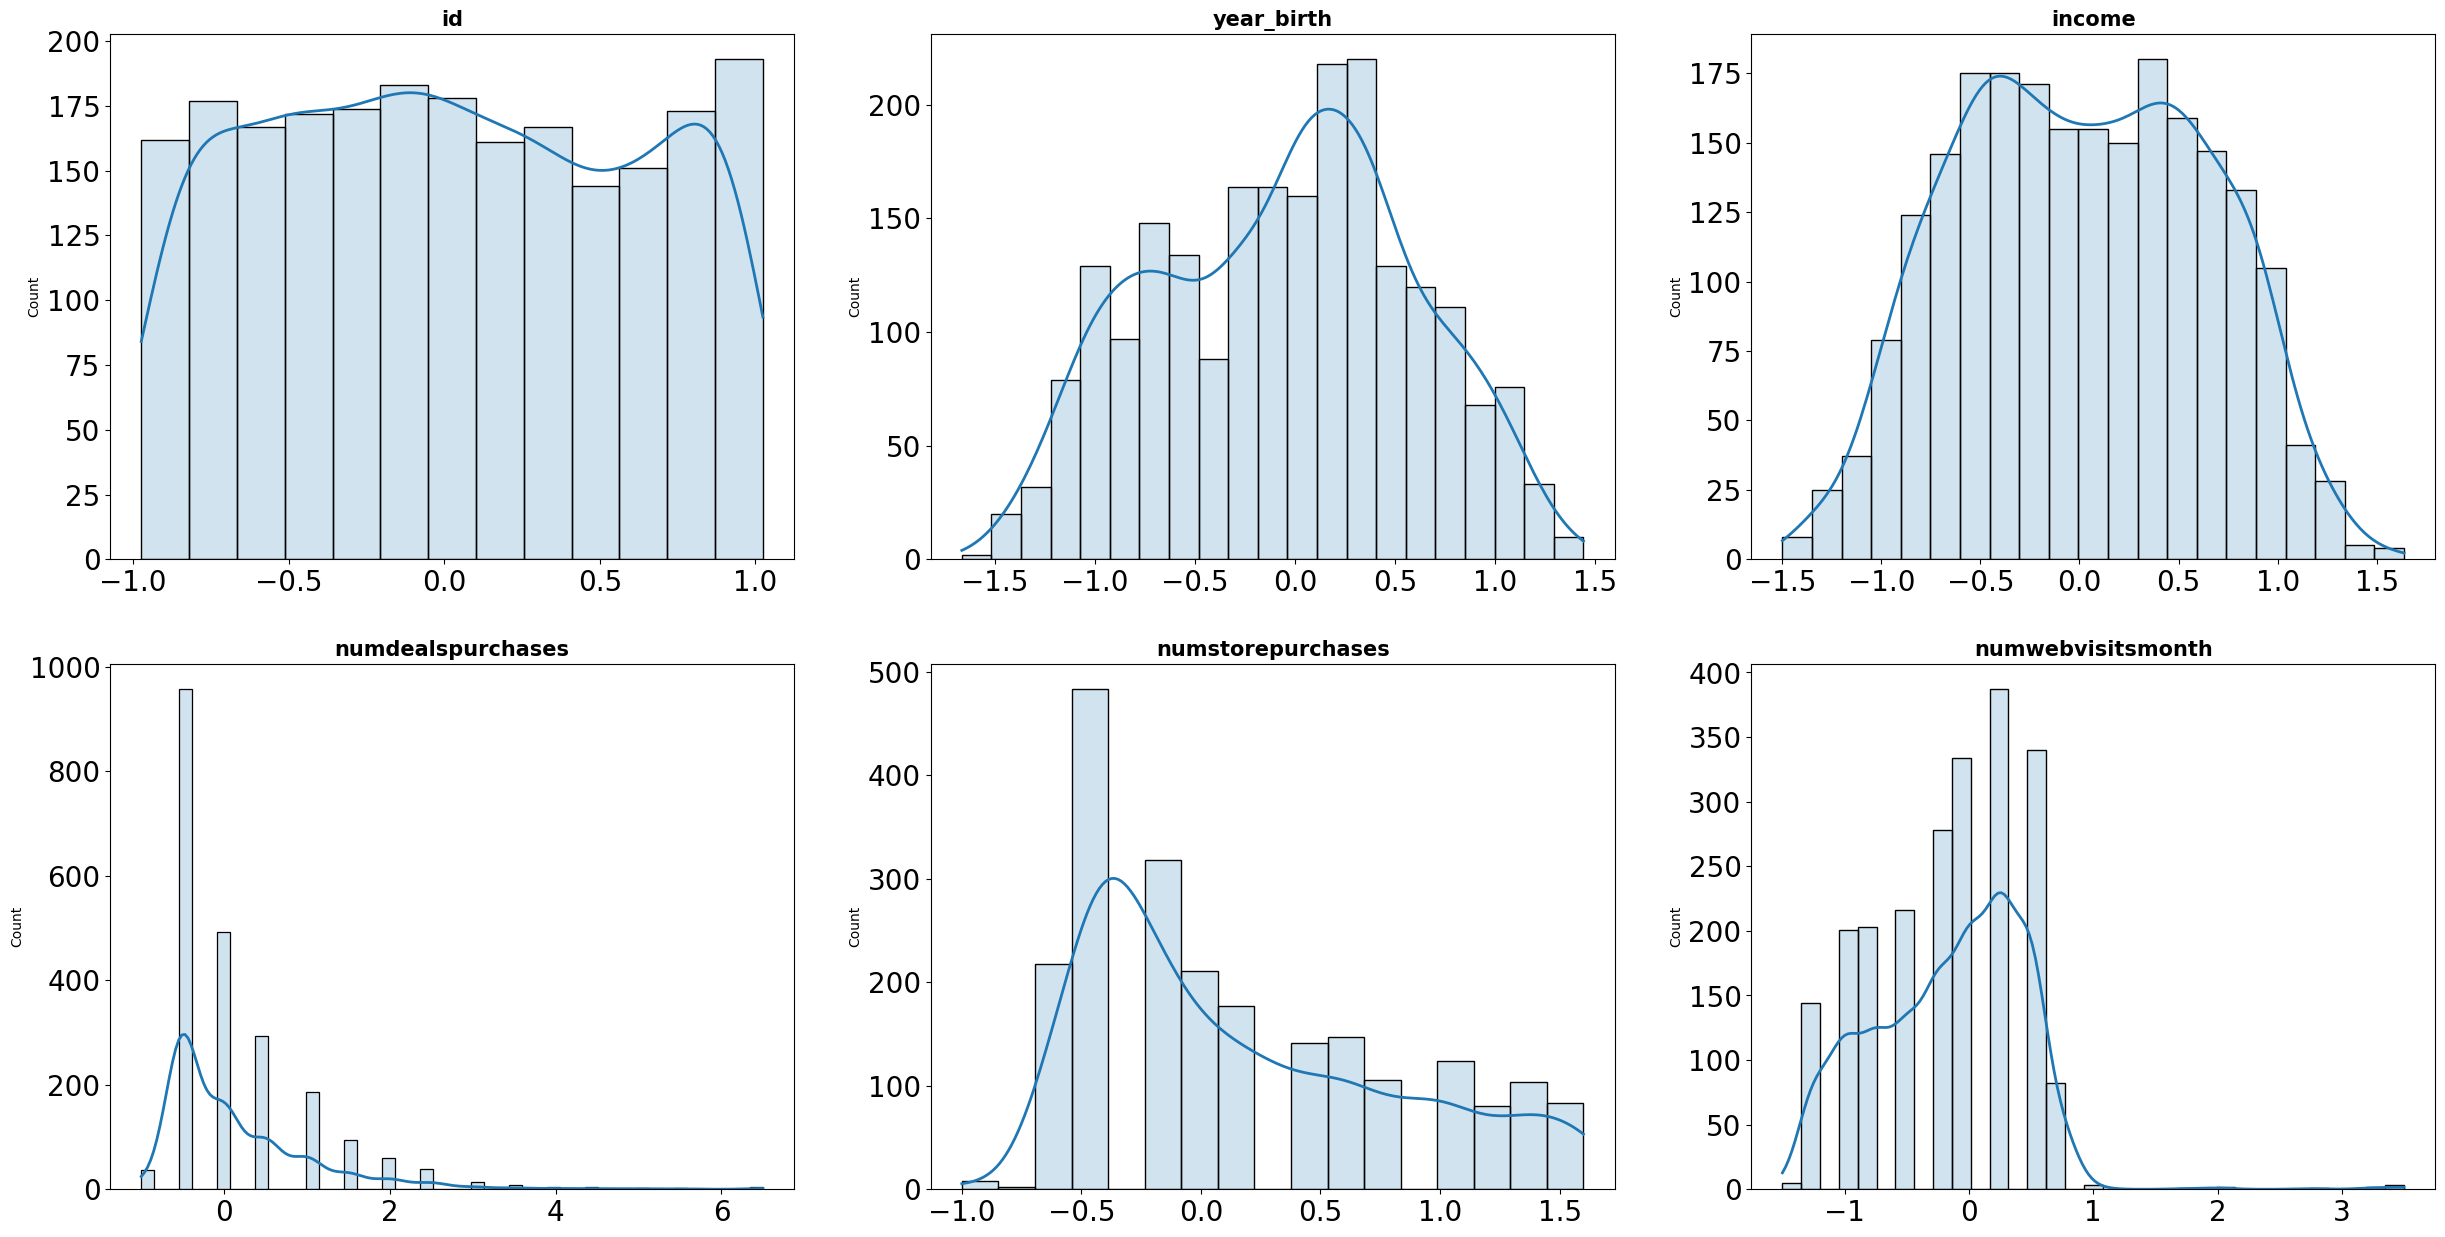

In [46]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 15))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

Viendo este gráfico comprobamos que la escala del eje X varía con respecto al método StandarScaler, siendo la distribución de los datos muy parecida.
Un ejemplo de ello sería el caso de "Income" que hemos visto anteriormente la forma de la gráfica se ve igual pero el rango del eje X en este caso es inferior, ya que va desde -1.5 a 1.5.

In [47]:
df.head()

,id,year_birth,education,marital_status,income,dt_customer,numdealspurchases,numstorepurchases,numwebvisitsmonth,numwebpurchases_sklearn
0,1826,1970,Graduation,Divorced,84835.0,6/16/2014,1,6,1,0.363636
1,1,1961,Graduation,Single,57091.0,6/15/2014,1,7,5,0.636364
2,10476,1958,Graduation,Married,67267.0,5/13/2014,1,5,2,0.272727
3,1386,1967,Graduation,Together,32474.0,11/5/2014,1,2,7,0.090909
4,5371,1989,Graduation,Single,21474.0,8/4/2014,2,2,7,0.272727


Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [48]:
# Creamos dos copias del dataframe para así tener un nuevo dataframe con las variables estandarizadas con el método "Standard"
# y otro dataframe con las variables estandarizadas con el método "Robust".
df_estandar = df.copy()
df_robust = df.copy()

In [49]:
df_estandar[numericas_estandar.columns] = numericas_estandar
df_estandar.head()

,id,year_birth,education,marital_status,income,dt_customer,numdealspurchases,numstorepurchases,numwebvisitsmonth,numwebpurchases_sklearn
0,-1.157073,0.092613,Graduation,Divorced,1.608976,6/16/2014,-0.701068,0.052191,-1.803407,0.363636
1,-1.719067,-0.676627,Graduation,Single,0.264394,6/15/2014,-0.701068,0.361131,-0.142553,0.636364
2,1.506626,-0.933040,Graduation,Married,0.757562,5/13/2014,-0.701068,-0.256748,-1.388194,0.272727
3,-1.292567,-0.163800,Graduation,Together,-0.928642,11/5/2014,-0.701068,-1.183568,0.687874,0.090909
4,-0.065418,1.716564,Graduation,Single,-1.461745,8/4/2014,-0.170569,-1.183568,0.687874,0.272727


In [50]:
df_robust[numericas_robust.columns] = numericas_robust
df_robust.head()

,id,year_birth,education,marital_status,income,dt_customer,numdealspurchases,numstorepurchases,numwebvisitsmonth,numwebpurchases_sklearn
0,-0.647571,0.000000,Graduation,Divorced,1.014008,6/16/2014,-0.5,0.2,-1.25,0.363636
1,-0.973274,-0.500000,Graduation,Single,0.175079,6/15/2014,-0.5,0.4,-0.25,0.636364
2,0.896176,-0.666667,Graduation,Married,0.482783,5/13/2014,-0.5,0.0,-1.00,0.272727
3,-0.726096,-0.166667,Graduation,Together,-0.569295,11/5/2014,-0.5,-0.6,0.25,0.090909
4,-0.014902,1.055556,Graduation,Single,-0.901915,8/4/2014,0.0,-0.6,0.25,0.272727


In [51]:
# Guardamos estos dos dataframes en diferentes csv para poder trabajar con ellos en lecciones posteriores.

df_estandar.to_csv("supermercado_estandarizado_standard.csv")
df_robust.to_csv("supermercado_estandarizado_robust.csv")

Happy coding💪🏽